In [1]:
%matplotlib inline
import os
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import utils
import librosa
import librosa.display
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB

In [2]:
df = pd.read_excel(r'./dataset.xlsx')
df = df.set_index(df.iloc[:,0].name)

In [3]:
scaler = preprocessing.StandardScaler()

df[['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'speechiness', 'tempo', 'valence', 'mfcc_mean',
       'chroma_cens_mean', 'chroma_cqt_mean', 'chroma_stft_mean',
       'tonnetz_mean', 'spectral_contrast_mean', 'spectral_centroid_mean',
       'spectral_bandwidth_mean', 'spectral_rolloff_mean', 'rmse_mean',
       'zcr_mean']] = scaler.fit_transform(df[['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'speechiness', 'tempo', 'valence', 'mfcc_mean',
       'chroma_cens_mean', 'chroma_cqt_mean', 'chroma_stft_mean',
       'tonnetz_mean', 'spectral_contrast_mean', 'spectral_centroid_mean',
       'spectral_bandwidth_mean', 'spectral_rolloff_mean', 'rmse_mean',
       'zcr_mean']])

df.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,mfcc_mean,chroma_cens_mean,chroma_cqt_mean,chroma_stft_mean,tonnetz_mean,spectral_contrast_mean,spectral_centroid_mean,spectral_bandwidth_mean,spectral_rolloff_mean,rmse_mean,zcr_mean,Electronic labeler
track_id,,,,,,,,,,,,,,,,,,,,
2,-0.288519,0.982312,0.349387,-1.744299,-0.046462,0.482131,1.266050,0.490339,-0.438488,0.667869,0.652836,-0.552811,1.206044,-0.025942,1.036232,0.398672,0.847513,-0.552881,1.534804,0
3,-0.399234,0.207262,1.017482,-1.768594,-0.510031,2.777503,0.123731,-0.627530,0.199917,1.069189,1.086740,0.379882,0.235017,-0.024231,1.334086,0.730280,1.107144,-0.363652,1.486685,0
5,-1.265834,1.349028,0.593988,-1.771789,1.216329,0.218723,-0.658933,0.653973,0.004753,0.985098,0.858930,-0.351168,-0.577659,-0.023659,0.199770,0.156518,0.327997,-0.524571,0.046049,0
10,1.112839,0.889068,1.408383,0.898637,-0.448060,-0.476397,-0.327597,1.897323,0.010304,1.279819,1.670373,0.109657,-1.372757,-0.220586,0.361622,-0.080773,0.148707,-0.234162,1.163252,0
134,-0.195421,0.126178,0.078964,-1.719900,-0.570189,3.260855,-0.247622,1.644537,-0.071229,0.562875,0.855864,0.150201,-0.574985,-0.410579,0.114678,-0.350417,0.000517,-0.497763,0.561394,0


## Naive Bayes
Non abbiamo variabili categoriche nel dataset, perciò usiamo GaussianNB

In [4]:
attributes = [col for col in df.columns if col != 'Electronic labeler']
X = df[attributes].values
y = df['Electronic labeler']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.42, stratify=y)

In [5]:
clf = GaussianNB()
clf = clf.fit(X_train, y_train)

In [6]:
y_pred = clf.predict(X_test)

In [7]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7441283177391637
F1-score [0.82520219 0.52279202]
              precision    recall  f1-score   support

           0       0.85      0.80      0.83      3942
           1       0.49      0.57      0.52      1295

    accuracy                           0.74      5237
   macro avg       0.67      0.68      0.67      5237
weighted avg       0.76      0.74      0.75      5237



In [8]:
confusion_matrix(y_test, y_pred)

array([[3163,  779],
       [ 561,  734]])

In [9]:
fpr1, tpr1, _ = roc_curve(y_test, y_pred)
roc_auc1 = auc(fpr1, tpr1)
print(roc_auc1)

roc_auc1 = roc_auc_score(y_test, y_pred)

0.6845899715762729


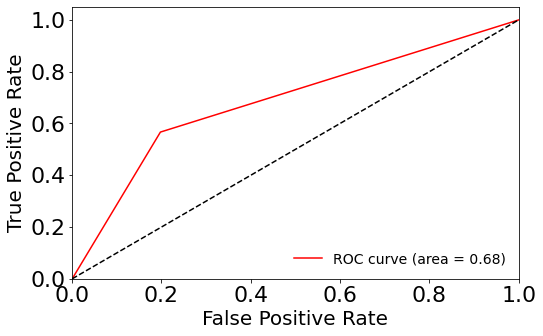

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(fpr1, tpr1, label='ROC curve (area = %0.2f)' % (roc_auc1), c = 'r')
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0],)
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

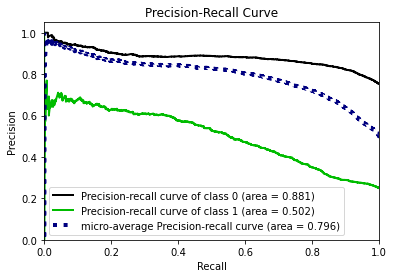

In [11]:
y_score = clf.predict_proba(X_test)

plot_precision_recall(y_test, y_score)
plt.show()

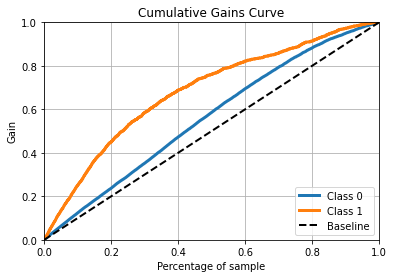

In [12]:
plot_cumulative_gain(y_test, y_score)
plt.show()

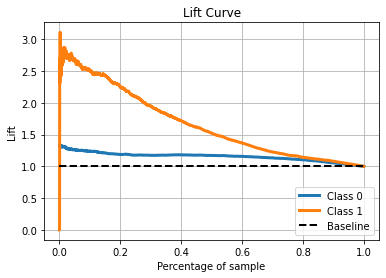

In [13]:
plot_lift_curve(y_test, y_score)
plt.show()